# Creditcard dataset

In [2]:
import pandas as pd
import numpy as np
import sklearn
import pandas.util.testing as tm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
import pandas.util.testing as tm
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import make_scorer

C:\Users\Vishap\AppData\Local\Temp\ipykernel_5764\20139794.py:4: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
credit_card_df = pd.read_csv("creditcard_3.csv")
credit_card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_card_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
credit_card_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
column_names_list=credit_card_df.columns
column_names_list

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
credit_card_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
X=credit_card_df.drop(['Class'],axis=1)
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [10]:
X= credit_card_df.dropna()   # Drop rows which contain missing values
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [11]:
y=credit_card_df['Class']
y= y.dropna()
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

# Splitting the dataset for Train and Test

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

# Model 1: Decision Tree Classifier

C:\Users\Vishap\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       1.00      1.00      1.00        96

    accuracy                           1.00     56962
   macro avg       1.00      1.00      1.00     56962
weighted avg       1.00      1.00      1.00     56962



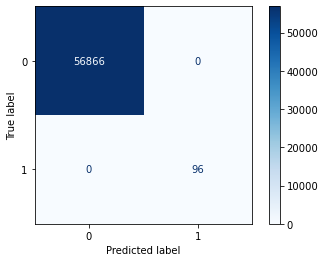

In [13]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib as mplt

clf_dt=DecisionTreeClassifier(criterion="entropy", random_state=10, max_depth=2, min_samples_leaf=4)
clf_dt.fit(X_train,y_train)
y_predict=clf_dt.predict(X_test)
plot_confusion_matrix(clf_dt,X_test,y_test, cmap=mplt.cm.Blues)
print(classification_report(y_test, y_predict))

In [14]:
cl_dt=DecisionTreeClassifier()
cl_dt.fit(X_train,y_train)
y_predict=cl_dt.predict(X_test)
print(y_predict)

[0 0 0 ... 0 0 0]


In [15]:
score1=accuracy_score(y_test,y_predict)
print("Accuracy without cross-validation : {}".format(score1))

score2 = cross_val_score(clf_dt, X_train, y_train, cv=10)
print(score2)
print("Accuracy after cross-validation : {} (+/- {})".format(score2.mean(),score2.std()))

score3 = cross_val_score(clf_dt, X_train, y_train, cv=10,scoring=make_scorer(cohen_kappa_score))
print(score3)
print("Cohen Kappa Score after cross-validation : {} (+/- {})".format(score3.mean(),score3.std()))

Accuracy without cross-validation : 1.0
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy after cross-validation : 1.0 (+/- 0.0)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Cohen Kappa Score after cross-validation : 1.0 (+/- 0.0)


# Model 2 : Random forest implementation

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as mplt
from sklearn.metrics import classification_report

C:\Users\Vishap\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       1.00      1.00      1.00        96

    accuracy                           1.00     56962
   macro avg       1.00      1.00      1.00     56962
weighted avg       1.00      1.00      1.00     56962



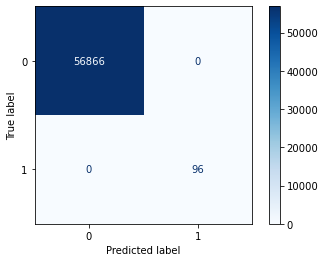

In [17]:
clf_rf=RandomForestClassifier(n_jobs=2,random_state=0)
clf_rf.fit(X_train,y_train)
y_predict=clf_rf.predict(X_test)
plot_confusion_matrix(clf_rf,X_test,y_test, cmap=mplt.cm.Blues)
print(classification_report(y_test, y_predict))

In [18]:
from sklearn.metrics import accuracy_score
score1_rf=accuracy_score(y_test,y_predict)
print("Accuracy without cross-validation : {}".format(score1_rf))


Accuracy without cross-validation : 1.0


In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import cohen_kappa_score
score2_rf = cross_val_score(clf_rf, X_train, y_train, cv=10)
print(score2_rf)
print("Accuracy after cross-validation : {} (+/- {})".format(score2_rf.mean(),score2_rf.std()))

score3_rf = cross_val_score(clf_rf, X_train, y_train, cv=10,scoring=make_scorer(cohen_kappa_score))
print(score3_rf)
print("Cohen Kappa Score after cross-validation : {} (+/- {})".format(score3_rf.mean(),score3_rf.std()))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy after cross-validation : 1.0 (+/- 0.0)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Cohen Kappa Score after cross-validation : 1.0 (+/- 0.0)


In [20]:
Class_count=credit_card_df['Class'].value_counts()
print(Class_count)

0    284315
1       492
Name: Class, dtype: int64


In [21]:
imbalance_Class=(Class_count[0]/(Class_count[0]+Class_count[1]))*100
print(imbalance_Class)

99.82725143693798


-- 10-fold cross-validation 
1.0


C:\Users\Vishap\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


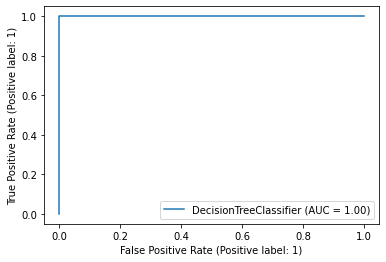

In [22]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve


# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("-- 10-fold cross-validation ")

#Defining Decision Tree
dt_clf = DecisionTreeClassifier(min_samples_split=20,
                                random_state=99)

#Training Decision Tree
dt_clf.fit(X_train, y_train)

#Cross Validating using Decision Tree
scores =cross_validate(dt_clf,  X_test, y_test.values.ravel(),
                     cv=10)


#Result
print(scores['test_score'].mean())

plot_roc_curve(dt_clf, X_test, y_test.values.ravel())
plt.show()

0.9999824438202246


C:\Users\Vishap\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


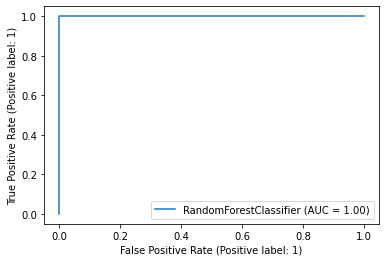

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve

#Defining Random Forest Classifier
rf_clf = RandomForestClassifier()

#Training Random Forest Classifier
rf_clf.fit(X_train, y_train)

#Cross Validating Random Forest
scores =cross_validate(rf_clf, X_test, y_test.values.ravel(),
                     cv=10)

#Result
print(scores['test_score'].mean())

plot_roc_curve(rf_clf, X_test, y_test.values.ravel())
plt.show() 

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score as acc


cv = StratifiedKFold(n_splits=10)
classifier = RandomForestClassifier()

rf_clf =RandomForestClassifier()
dt_clf=DecisionTreeClassifier()
skf = StratifiedKFold(n_splits=10)
rf_score=[]
dt_score=[]
for train,test in skf.split(X, y):
  rf_clf.fit(X.iloc[train],y.iloc[train].values.ravel())
  dt_clf.fit(X.iloc[train],y.iloc[train].values.ravel())
  yrf_pred=rf_clf.predict(X.iloc[test])
  ydt_pred=dt_clf.predict(X.iloc[test])
  y_true=y.iloc[test]
  dt_score.append(acc(y_true.values.ravel(),ydt_pred))
  rf_score.append(acc(y_true.values.ravel(),yrf_pred))
  print("Score for stratified Decision Tree is")
  print(dt_score) 
  print( 'Stratified Random Forest Tree')
  print(rf_score)

Score for stratified Decision Tree is
[1.0]
Stratified Random Forest Tree
[1.0]
Score for stratified Decision Tree is
[1.0, 1.0]
Stratified Random Forest Tree
[1.0, 1.0]
Score for stratified Decision Tree is
[1.0, 1.0, 1.0]
Stratified Random Forest Tree
[1.0, 1.0, 1.0]
Score for stratified Decision Tree is
[1.0, 1.0, 1.0, 1.0]
Stratified Random Forest Tree
[1.0, 1.0, 1.0, 1.0]
Score for stratified Decision Tree is
[1.0, 1.0, 1.0, 1.0, 1.0]
Stratified Random Forest Tree
[1.0, 1.0, 1.0, 1.0, 1.0]
Score for stratified Decision Tree is
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Stratified Random Forest Tree
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Score for stratified Decision Tree is
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Stratified Random Forest Tree
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Score for stratified Decision Tree is
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Stratified Random Forest Tree
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Score for stratified Decision Tree is
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1

# Analyzing the number of clusters using Elbow method and Silhouette method

silhouette %dth score:%d  2 0.7137827543072723
silhouette %dth score:%d  3 0.6315976547596166
silhouette %dth score:%d  4 0.5870863138495852
silhouette %dth score:%d  5 0.5763381155159922
silhouette %dth score:%d  6 0.5772473462143376
silhouette %dth score:%d  7 0.5648937219705328
silhouette %dth score:%d  8 0.551198290089822
silhouette %dth score:%d  9 0.5395168023369764
silhouette %dth score:%d  10 0.5431787271503885
silhouette %dth score:%d  11 0.5365029828693184
silhouette %dth score:%d  12 0.5358098481287511
silhouette %dth score:%d  13 0.53187288621717
silhouette %dth score:%d  14 0.5287945498708055
distortion is  [16906.343694312905, 12203.57352128923, 9064.927153665325, 7736.499952266375, 6540.140122204606, 5409.792108611005, 4829.750243909274, 4306.309288202891, 3935.770093826139, 3589.1923999031164, 3282.7789224283442, 3063.936734056582, 2849.8251293897197]


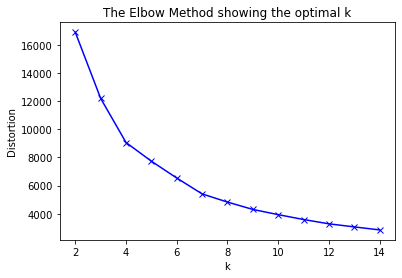

In [25]:
 # clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(2,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    labels = kmeanModel.labels_
    print("silhouette %dth score:%d ",k, metrics.silhouette_score(X, labels, metric='euclidean'))
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

print("distortion is ", distortions)

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [26]:
print("Decision Tree model:")
print("Accuracy (after cross-validation): {} (+/- {})".format(score2.mean(),score2.std()))
print("Random Forest model:")
print("Accuracy (after cross-validation): {} (+/- {})".format(score2_rf.mean(),score2_rf.std()))

Decision Tree model:
Accuracy (after cross-validation): 1.0 (+/- 0.0)
Random Forest model:
Accuracy (after cross-validation): 1.0 (+/- 0.0)


# Permutation Tests

In [27]:
def calc_pvalue(iterations,data_1,data_2,t_obs):
  concat = np.concatenate((data_1,data_2))
  cnt=0
  for i in range(0,iterations):
    perm = np.random.permutation(concat)
    pcurrent = perm[:len(data_1)]
    pnew = perm[len(data_1):]
    mean_perm_current=pcurrent.mean()
    mean_perm_new=pnew.mean()
    t_perm=mean_perm_new-mean_perm_current
    if(t_perm>t_obs):
      cnt+=1
  p_value=cnt/iterations
  return p_value

In [28]:
acc_old_1 = np.array([0.96428571, 0.96218487, 0.96428571, 0.96638655, 0.96428571, 0.96428571, 0.96428571, 0.96428571, 0.95798319, 0.96428571])
kappa_old_1=np.array([0.,0.09025271, 0., 0.10756972, 0., 0.,0.09848485, 0.10168739, -0.00762066,  0.10168739])
acc_old_2=np.array([0.96428571, 0.96428571, 0.96428571, 0.96428571, 0.96428571, 0.96428571, 0.96428571, 0.96218487, 0.96218487, 0.96218487])
kappa_old_2=np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

acc_new=np.array([0.96464646, 0.96464646, 0.96464646, 0.96464646, 0.96464646,0.96464646, 0.96464646, 0.96464646, 0.96464646, 0.96464646])
kappa_new=np.array([0.08595549, 0.08595549, 0.08595549, 0.08595549, 0.08595549, 0.08595549, 0.08595549, 0.08595549, 0.08595549, 0.08595549])

#Accuracy: DT and new
mean_old=acc_old_1.mean()
mean_new=acc_new.mean()
t_obs=mean_new-mean_old
p_val=calc_pvalue(50000,acc_old_1,acc_new,t_obs)
print("Accuracy comparison between Decision Tree and new method:")
print("p-value: {}".format(p_val))

#Accuracy: RF and new
mean_old=acc_old_2.mean()
mean_new=acc_new.mean()
t_obs=mean_new-mean_old
p_val=calc_pvalue(50000,acc_old_2,acc_new,t_obs)
print("Accuracy comparison between Random Forest and new method:")
print("p-value: {}".format(p_val))

#Kappa: DT and new
mean_old=kappa_old_1.mean()
mean_new=kappa_new.mean()
t_obs=mean_new-mean_old
p_val=calc_pvalue(50000,kappa_old_1,kappa_new,t_obs)
print("Kappa comparison between Decision Tree and new method:")
print("p-value: {}".format(p_val))

#Kappa: RF and new
mean_old=kappa_old_2.mean()
mean_new=kappa_new.mean()
t_obs=mean_new-mean_old
p_val=calc_pvalue(50000,kappa_old_2,acc_new,t_obs)
print("Kappa comparison between Random Forest and new method:")
print("p-value: {}".format(p_val))

Accuracy comparison between Decision Tree and new method:
p-value: 0.10046
Accuracy comparison between Random Forest and new method:
p-value: 0.0
Kappa comparison between Decision Tree and new method:
p-value: 0.01588
Kappa comparison between Random Forest and new method:
p-value: 0.32852


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7137827543072723
For n_clusters = 3 The average silhouette_score is : 0.6316035137983522
For n_clusters = 4 The average silhouette_score is : 0.5871181370808429
For n_clusters = 5 The average silhouette_score is : 0.5767344513920774
For n_clusters = 6 The average silhouette_score is : 0.5774268346808067
For n_clusters = 7 The average silhouette_score is : 0.5649715911782042
For n_clusters = 8 The average silhouette_score is : 0.5510775672231278
For n_clusters = 9 The average silhouette_score is : 0.5393663648202198
For n_clusters = 10 The average silhouette_score is : 0.5432260973142081


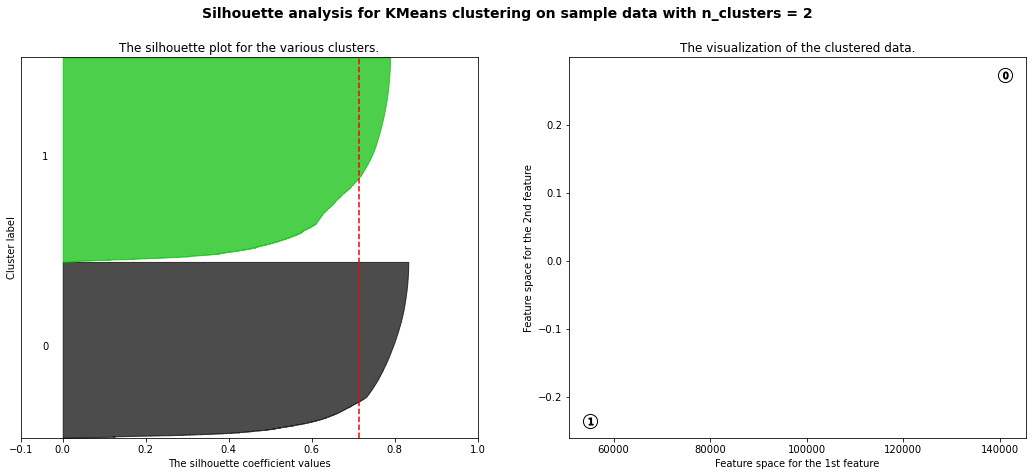

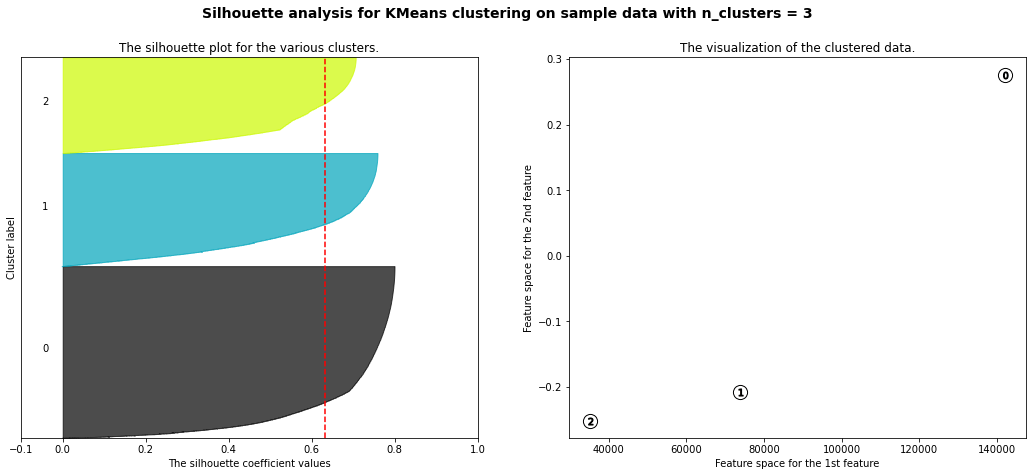

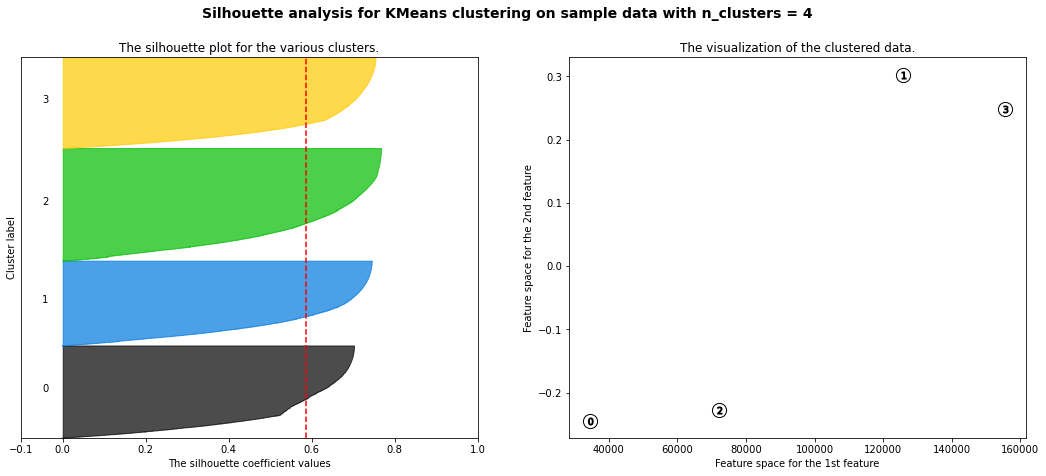

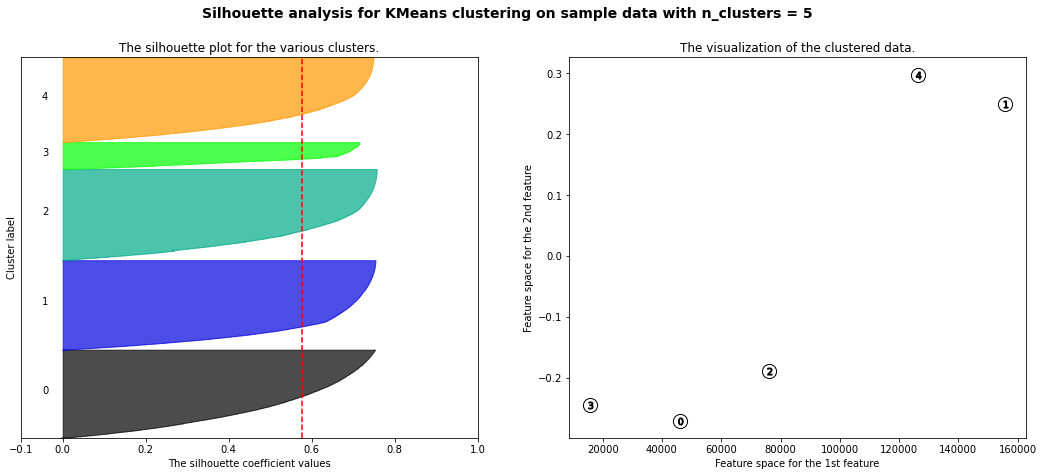

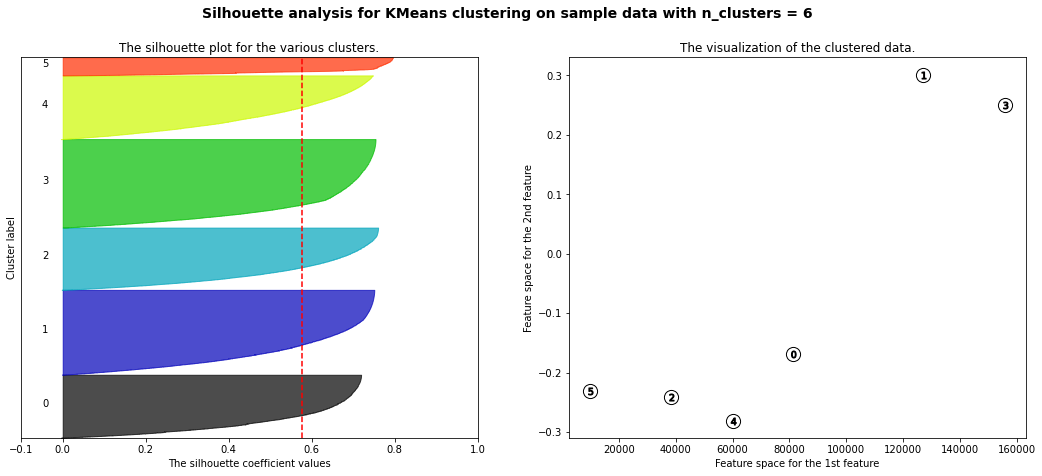

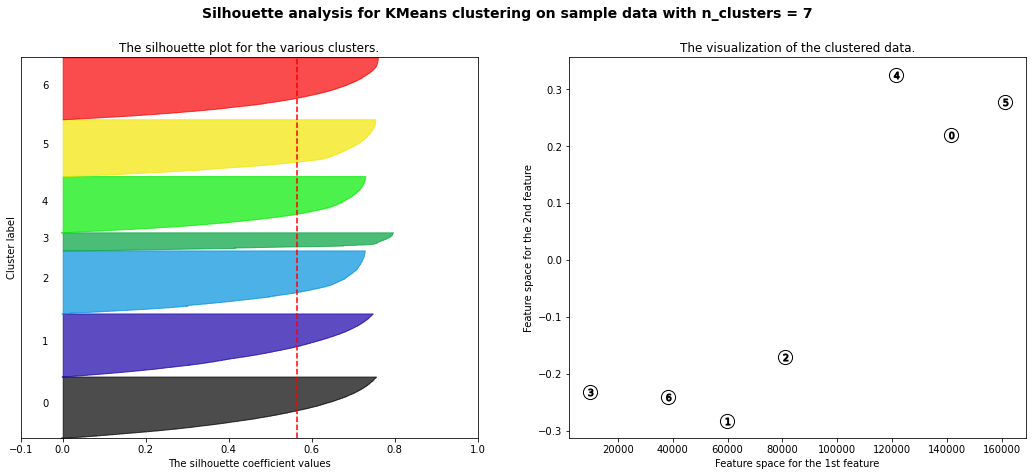

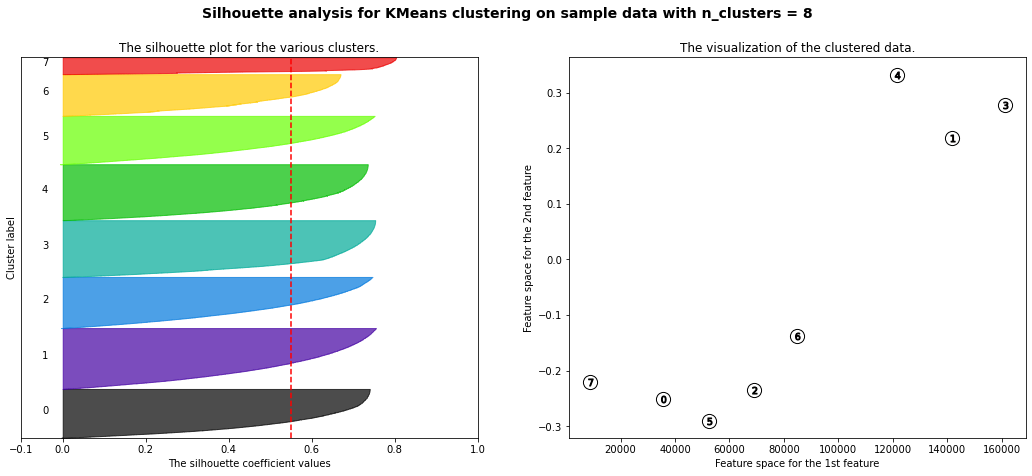

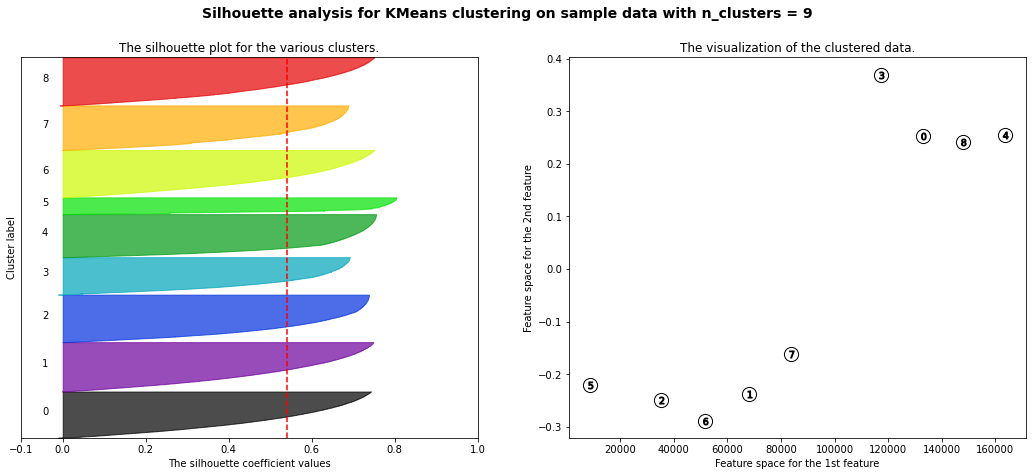

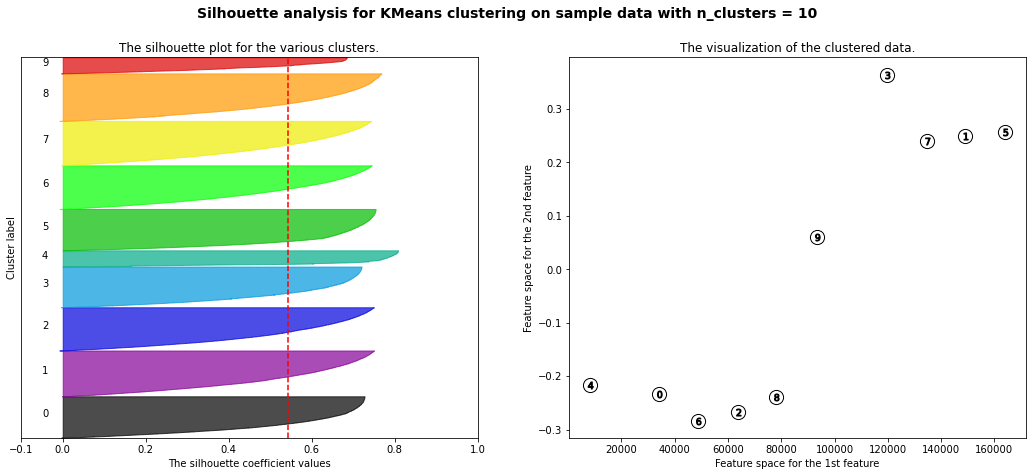

In [30]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.


for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
#     ax2.scatter(df3.iloc[:, 0], df3.iloc[:, 1], marker='p', s=30, lw=0, alpha=0.7,
#                 c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()